# Pretrained Model

- 다른 목적을 위해 미리 학습된 모델.
- Pretrained model을 현재 해결하려는 문제에 이용한다.
- 대부분 내가 만들려는 네트워크 모델에 pretrained model을 포함시켜 사용한다.
    - 이런 방식을 Transfer Learning (전이 학습)이라고 한다.
    - 보통 Feature Extractor block을 재사용한다.

## Pytorch에서 제공하는 Pretrained Model 
- 분야별 라이브러리에서 제공
    - torchvision: https://pytorch.org/vision/stable/models.html
- torch hub 를 이용해 모델과 학습된 parameter를 사용할 수 있다.
    - https://pytorch.org/hub/
- 이외에도 많은 모델과 학습된 paramter가 인터넷상에 공개되 있다.    
    - 딥러닝 모델기반 application을 개발 할 때는 대부분 Transfer Learning을 한다.  
    - 다양한 분야에서 연구된 많은 딥러닝 모델들이 구현되어 공개 되어 있으며 학습된 Parameter들도 제공되고 있다.  
    - [paperswithcode](https://paperswithcode.com/)에서 State Of The Art(SOTA) 논문들과 그 구현된 모델을 확인할 수 있다. 
    
>  **State Of The Art(SOTA)**: 특정 시점에 특정 분야에서 가장 성능이 좋은 모델을 말한다.

## VGGNet Pretrained 모델을 이용해 이미지 분류

- Output으로 1000개의 class에 대한 확률을 출력한다.



In [1]:
# 1000개의 class 목록
!pip install wget
import wget
url = 'https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt'
imagenet_filepath = wget.download(url)

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9680 sha256=5764bfca7a29033fe0e7ebf5f7525c79a8efd0c2069ae181eb112052efe0c73c
  Stored in directory: c:\users\playdata\appdata\local\pip\cache\wheels\8b\f1\7f\5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
100% [...................................................................] 30564 / 30564

In [2]:
imagenet_filepath

'imagenet1000_clsidx_to_labels.txt'

In [27]:
eval("1 + 2")

3

In [28]:
# json lib -> dictionary <-> json 형식 문자열. load():읽기, dump(): 쓰기
with open(imagenet_filepath, 'rt') as fr:
    index_to_class = eval(fr.read())
    
print(type(index_to_class))

<class 'dict'>


In [30]:
index_to_class[0]

'tench, Tinca tinca'

In [7]:
import torch
from torchvision import models, transforms
from torchinfo import summary

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


In [9]:
# torchvision이 제공하는 VGG 모델을 생성.
load_model = models.vgg19(weights=models.VGG19_Weights.DEFAULT)

In [10]:
load_model_2 = models.alexnet(weights=models.AlexNet_Weights.DEFAULT)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to C:\Users\Playdata/.cache\torch\hub\checkpoints\alexnet-owt-7be5be79.pth
100%|████████████████████████████████████████████████| 233M/233M [00:07<00:00, 31.1MB/s]


In [12]:
summary(load_model, (128, 3, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      [128, 1000]               --
├─Sequential: 1-1                        [128, 512, 7, 7]          --
│    └─Conv2d: 2-1                       [128, 64, 224, 224]       1,792
│    └─ReLU: 2-2                         [128, 64, 224, 224]       --
│    └─Conv2d: 2-3                       [128, 64, 224, 224]       36,928
│    └─ReLU: 2-4                         [128, 64, 224, 224]       --
│    └─MaxPool2d: 2-5                    [128, 64, 112, 112]       --
│    └─Conv2d: 2-6                       [128, 128, 112, 112]      73,856
│    └─ReLU: 2-7                         [128, 128, 112, 112]      --
│    └─Conv2d: 2-8                       [128, 128, 112, 112]      147,584
│    └─ReLU: 2-9                         [128, 128, 112, 112]      --
│    └─MaxPool2d: 2-10                   [128, 128, 56, 56]        --
│    └─Conv2d: 2-11                      [128, 256, 56, 56]        29

In [15]:
load_model = load_model.to(device)
input_data = torch.randn(1, 3, 224, 224).to(device)
pred_tmp = load_model(input_data)
pred_tmp.shape

torch.Size([1, 1000])

In [24]:
torch.nn.Softmax(dim=-1)(pred_tmp).sum()

tensor(1., grad_fn=<SumBackward0>)

In [25]:
pred_label = torch.argmax(pred_tmp, dim=-1)
pred_label

tensor([885])

In [31]:
index_to_class[pred_label.item()]

'velvet'

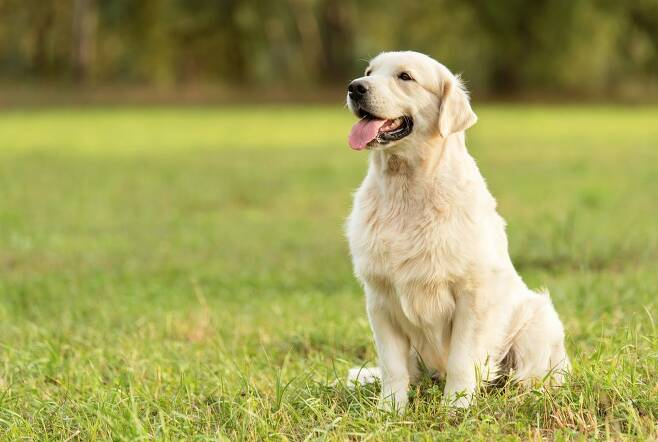

In [59]:
# 추론할 이미지 다운로드
import requests
from io import BytesIO
from PIL import Image

img_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/2/25/Common_goldfish.JPG/800px-Common_goldfish.JPG'
img_url = 'https://cdn.download.ams.birds.cornell.edu/api/v1/asset/169231441/1800'
img_url = 'https://blogs.ifas.ufl.edu/news/files/2021/10/anole-FB.jpg'
img_url = 'https://img4.daumcdn.net/thumb/R658x0.q70/?fname=https://t1.daumcdn.net/news/202302/08/bemypet/20230208182716232uvpm.jpg'
res = requests.get(img_url)
test_img = Image.open(BytesIO(res.content))
test_img

In [60]:
test_transform = transforms.Compose([
    transforms.Resize((224, 224)), # VGG 모델의 입력 크기->224, 224
    transforms.ToTensor(), 
    # 1. PIL.Image -> Tensor, 2. MinMax Scaling(0 ~ 1), 3. Channel First 처리. 
])

In [61]:
# 추론할 Image(PIL.Image) -> 전처리.
test_tensor = test_transform(test_img)
test_tensor = test_tensor.unsqueeze(dim=0)
test_tensor.shape

torch.Size([1, 3, 224, 224])

In [62]:
# 추론
load_model.eval()
with torch.no_grad():
    pred = load_model(test_tensor)
    # class
    pred_label = pred.argmax(dim=-1)
    pred_proba_tmp = torch.nn.Softmax(dim=-1)(pred)
    # class일 확률
    pred_proba = pred_proba_tmp.max(dim=-1)

In [63]:
pred_label, index_to_class[pred_label.item()], pred_proba.values

(tensor([216]), 'clumber, clumber spaniel', tensor([0.3685]))

# Transfer learning (전이학습)
- 사전에 학습된 신경망의 구조와 파라미터를 재사용해서 새로운 모델(우리가 만드는 모델)의 시작점으로 삼고 해결하려는 문제를 위해 다시 학습시킨다.
- 전이 학습을 통해 다음을 해결할 수 있다.
    1. 데이터 부족문제
        - 딥러닝은 대용량의 학습데이터가 필요하다.
        - 충분한 데이터를 수집하는 것은 항상 어렵다.
    2. 과다한 계산량
        - 신경망 학습에는 엄청난 양의 계산 자원이 필요하다.

![transfer_learning01](figures/09_transfer_01.png)

- 미리 학습된(pre-trained) Model을 이용하여 모델을 구성한 뒤 현재 하려는 예측 문제를 해결한다.
- 보통 Pretrained Model에서 Feature Extraction 부분을 사용한다.
    - Computer Vision 문제의 경우 Bottom 쪽의 Convolution Layer(Feature Extractor)들은 이미지에 나타나는 일반적인 특성을 추출하므로 **다른 대상을 가지고 학습했다고 하더라도 재사용할 수 있다.**
    - Top 부분 Layer 부분은 특히 출력 Layer의 경우 대상 데이터셋의 목적에 맞게 변경 해야 하므로 재사용할 수 없다.

![transfer_learning02](figures/09_transfer_02.png)

> **Frozon**: Training시 parameter가 update 되지 않도록 하는 것을 말한다.

### Feature extraction 재사용
- Pretrained Model에서 Feature Extractor 만 가져오고 추론기(Fully connected layer)만 새로 정의한 뒤 그 둘을 합쳐서 모델을 만든다.
- 학습시 직접 구성한 추론기만 학습되도록 한다.
    - Feature Extractor는 추론을 위한 Feature 추출을 하는 역할만 하고 그 parameter(weight)가 학습되지 않도록 한다.
- 모델/레이어의 parameter trainable 여부 속성 변경
    - model/layer 의 `parameters()` 메소드를 이용해 weight와 bias를 조회한 뒤 `requires_grad` 속성을 `False`로 변경한다.
        
#### Backbone, Base network
전체 네트워크에서 Feature Extraction의 역할을 담당하는 부분을 backbone/base network라고 한다.

## Fine-tuning(미세조정)
- Transfer Learning을 위한 Pretrained 모델을 내가 학습시켜야 하는 데이터셋(Custom Dataset)으로 **재학습**시키는 것을 fine tunning 이라고 한다.
- 주어진 문제에 더 적합하도록 Feature Extractor의 가중치들도 조정 한다.

### Fine tuning 전략
![transfer02](figures/09_transfer_03.png)

- **세 전략 모두 추론기는 trainable로 한다.**

**<font size='5'>1. 전체 모델을 전부 학습시킨다.(1번)</font>**    
- Pretrained 모델의 weight는 Feature extraction 의 초기 weight 역할을 한다.
- **Train dataset의 양이 많고** Pretrained 모델이 학습했던 dataset과 Custom dataset의 class간의 유사성이 **낮은 경우** 적용.
- 학습에 시간이 많이 걸린다.
    
    
**<font size='5'>2. Pretrained 모델 Bottom layer들(Input과 가까운 Layer들)은 고정시키고 Top layer의 일부를 재학습시킨다.(2번)</font>**     
- **Train dataset의 양이 많고** Pretrained 모델이 학습했던 dataset과 Custom dataset의 class간의 유사성이 **높은 경우** 적용.
- **Train dataset의 양이 적고** Pretained 모델이 학습했던 dataset과 custom dataset의 class간의 유사성이 **낮은 경우** 적용
    
    
**<font size='5'>3. Pretrained 모델 전체를 고정시키고 classifier layer들만 학습시킨다.(3번)</font>**      
- **Train dataset의 양이 적고** Pretrained 모델이 학습했던 dataset과 Custom dataset의 class간의 유사성이 **높은 경우** 적용.
  
  
> **Custom dataset:** 내가 학습시키고자 하는 dataset 
> 1번 2번 전략을 Fine tuning 이라고 한다.

![fine tuning](figures/09_finetuning.png)

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, datasets, transforms
from torchinfo import summary

from module.train import fit
from module.utils import plot_fit_result

import os
from zipfile import ZipFile

!pip install gdown -U
import gdown

device = 'cuda' if torch.cuda.is_available() else "cpu"
device

'cpu'

In [65]:
# download
url = 'https://drive.google.com/uc?id=1YIxDL0XJhhAMdScdRUfDgccAqyCw5-ZV'
path = r'data/cats_and_dogs_small.zip'
gdown.download(url, path, quiet=False)

Downloading...
From (uriginal): https://drive.google.com/uc?id=1YIxDL0XJhhAMdScdRUfDgccAqyCw5-ZV
From (redirected): https://drive.google.com/uc?id=1YIxDL0XJhhAMdScdRUfDgccAqyCw5-ZV&confirm=t&uuid=69257a0f-1c84-45ff-bb09-798c9951ab3d
To: C:\DA_30_classes\07_deeplearning\data\cats_and_dogs_small.zip
100%|██████████████████████████████████████████████| 90.8M/90.8M [00:01<00:00, 49.0MB/s]


'data/cats_and_dogs_small.zip'

In [66]:
image_path = os.path.join('data', 'cats_and_dogs_small')
with ZipFile(path) as zfile:
    zfile.extractall(image_path)

### Dataset, DataLoader

In [15]:
# transform -> Image augmentation + Resize
train_transform = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.5, hue=0.15),  # 정수: 1-0.3 ~ 1+0.3
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(), 
    transforms.RandomRotation(degrees=90), #-90 ~ 90
    transforms.ToTensor(), 
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(), 
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

In [71]:
image_path
os.path.join(image_path, "train")

'data\\cats_and_dogs_small\\train'

In [132]:
# Dataset
train_set = datasets.ImageFolder(os.path.join(image_path, "train"), 
                                 transform=train_transform)
valid_set = datasets.ImageFolder(os.path.join(image_path, "validation"), 
                                 transform=test_transform)
test_set = datasets.ImageFolder(os.path.join(image_path, "test"), 
                                transform=test_transform)

In [73]:
train_set.classes

['cats', 'dogs']

In [74]:
train_set.class_to_idx

{'cats': 0, 'dogs': 1}

In [75]:
len(train_set), len(valid_set), len(test_set)

(2000, 1000, 1000)

In [77]:
BATCH_SIZE = 256
LR = 0.001
N_EPOCH = 10

In [79]:
os.cpu_count()

8

In [133]:
# DataLoader
from torch.utils.data import DataLoader
train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, drop_last=True,
                          shuffle=True, num_workers=os.cpu_count())  # 병렬처리->cpu의 개수
valid_loader = DataLoader(valid_set, BATCH_SIZE, num_workers=os.cpu_count())
test_loader = DataLoader(test_set, BATCH_SIZE, num_workers=os.cpu_count())

In [134]:
# step수
len(train_loader), len(valid_loader), len(test_loader)

(7, 4, 4)

In [135]:
x, y = next(iter(train_loader))
y.shape

torch.Size([256])

In [137]:
# VGG19
model = models.vgg19(weights=models.VGG19_Weights.DEFAULT)

In [138]:
# 레이어들의 파라미터(weight와 bias)를  
# Frozon (학습이 안되도록 처리->오차역전파시 업데이트 되지 안도록 한다.)-requries_grad=False
for param in model.parameters():
    param.requires_grad = False

In [107]:
for param in model.parameters():
    print(param.requires_grad )

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [139]:
model.classifier = nn.Sequential(
    nn.Linear(25088, 4096), 
    nn.ReLU(), 
    nn.Dropout(p=0.3),
    nn.Linear(4096, 4096), 
    nn.ReLU(),
    nn.Dropout(p=0.3),
    nn.Linear(4096, 2),  # 다중 분류 문제
#     nn.Sigmoid()
)

In [140]:
input_data = torch.randn(1, 3, 224, 224)
pred = model(input_data)

In [141]:
pred 

tensor([[-0.0686, -0.0281]], grad_fn=<AddmmBackward0>)

In [142]:
model = model.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
result = fit(train_loader, valid_loader, model, loss_fn, optimizer, 1, 
            save_best_model=False, device=device, mode='multi')

Epoch[1/1] - Train loss: 0.60035 Train Accucracy: 0.44400 || Validation Loss: 0.49097 Validation Accuracy: 0.50700
1971.1056966781616 초


In [118]:
fit?

In [108]:
# 모델의 파라미터들 조회 (weigh, bias)
# model.layer.weight, model.layer.bias
# model.parameters(): generator
model
# def __init__(self):
#     self.features = nn.Sequential(Conv2d(), ReLU(), Conv2d())
    
# m.features[0] 

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [ ]:
# def __init__(self):
#     self.classifier = nn.Sequential(
#         nn.Linear(in_features=25088, out_features=4096, bias=True), 
#         nn.ReLU(inplace=True)
#         ..
#     )
    
# model.classifier = None

In [95]:
# layer를 조회
model.features[0]
# model.features[1]
# model.features[4]

Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [100]:
model.features[0].weight.shape, model.features[0].weight.requires_grad
model.features[0].bias.shape, model.features[0].bias.requires_grad

(torch.Size([64]), True)

In [ ]:
loss.backward()

In [ ]:
optimizer.step()

In [104]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [105]:
for param in model.parameters():
    print(param.shape, param.requires_grad)  # True: 미분가능->업데이트 대상.
    # layer: weight -> bias

torch.Size([64, 3, 3, 3]) True
torch.Size([64]) True
torch.Size([64, 64, 3, 3]) True
torch.Size([64]) True
torch.Size([128, 64, 3, 3]) True
torch.Size([128]) True
torch.Size([128, 128, 3, 3]) True
torch.Size([128]) True
torch.Size([256, 128, 3, 3]) True
torch.Size([256]) True
torch.Size([256, 256, 3, 3]) True
torch.Size([256]) True
torch.Size([256, 256, 3, 3]) True
torch.Size([256]) True
torch.Size([256, 256, 3, 3]) True
torch.Size([256]) True
torch.Size([512, 256, 3, 3]) True
torch.Size([512]) True
torch.Size([512, 512, 3, 3]) True
torch.Size([512]) True
torch.Size([512, 512, 3, 3]) True
torch.Size([512]) True
torch.Size([512, 512, 3, 3]) True
torch.Size([512]) True
torch.Size([512, 512, 3, 3]) True
torch.Size([512]) True
torch.Size([512, 512, 3, 3]) True
torch.Size([512]) True
torch.Size([512, 512, 3, 3]) True
torch.Size([512]) True
torch.Size([512, 512, 3, 3]) True
torch.Size([512]) True
torch.Size([4096, 25088]) True
torch.Size([4096]) True
torch.Size([4096, 4096]) True
torch.Size(

In [102]:
summary(model)

Layer (type:depth-idx)                   Param #
VGG                                      --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       1,792
│    └─ReLU: 2-2                         --
│    └─Conv2d: 2-3                       36,928
│    └─ReLU: 2-4                         --
│    └─MaxPool2d: 2-5                    --
│    └─Conv2d: 2-6                       73,856
│    └─ReLU: 2-7                         --
│    └─Conv2d: 2-8                       147,584
│    └─ReLU: 2-9                         --
│    └─MaxPool2d: 2-10                   --
│    └─Conv2d: 2-11                      295,168
│    └─ReLU: 2-12                        --
│    └─Conv2d: 2-13                      590,080
│    └─ReLU: 2-14                        --
│    └─Conv2d: 2-15                      590,080
│    └─ReLU: 2-16                        --
│    └─Conv2d: 2-17                      590,080
│    └─ReLU: 2-18                        --
│    └─MaxPool2d: 2-19             

## backbone network의 일부는 trainable, 일부는 frozon 시키기.
- Top(출력층)쪽 Layer를 trainable, Bottom(입력층) 쪽은 frozon 시킨다.

In [2]:
model2 = models.vgg19(weights=models.VGG19_Weights.DEFAULT)
model2

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [10]:
# 0 ~ 29번 conv : frozen
# 30번 ~  Conv:  tranable
## 시작-> 모두 trainable (require_grad = True)
# for param in model2.features.parameters():
#     print(param.shape)

for idx, layer in enumerate(model2.features): # Layer를 반환
    if idx < 30:
        for param in layer.parameters():
            param.requires_grad = False

In [13]:
for param in model2.features.parameters():
    print(param.requires_grad)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
True
True


In [14]:
#classification block 변경
model2.classifier = nn.Sequential(
    nn.Linear(25088, 4096), 
    nn.ReLU(), 
    nn.Dropout(p=0.3),
    nn.Linear(4096, 4096), 
    nn.ReLU(),
    nn.Dropout(p=0.3),
    nn.Linear(4096, 2),  # 다중 분류 문제
)

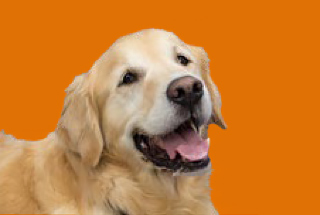

In [28]:
from PIL import Image

img = Image.open("test_img/dog.jpg")
img

In [30]:
input_tensor = test_transform(img)
input_tensor = input_tensor.unsqueeze(dim=0)
input_tensor.shape

torch.Size([1, 3, 224, 224])

In [33]:
pred = model2(input_tensor)
pred_proba = nn.Softmax(dim=-1)(pred)
pred_proba

tensor([[0.5817, 0.4183]], grad_fn=<SoftmaxBackward0>)

In [35]:
classes = ["cat", "dog"]
pred_label = classes[pred_proba.argmax(dim=-1).item()]
pred_label

'cat'

In [45]:
def inference(path):
    classes = ["cat", "dog"]
    
    img = Image.open(path)
    input_tensor = test_transform(img)
    input_tensor = input_tensor.unsqueeze(dim=0)
    pred = model2(input_tensor)
    pred_proba = nn.Softmax(dim=-1)(pred)
    
    pred_label = classes[pred_proba.argmax(dim=-1).item()]
    return pred_label, pred_proba.max().item()

In [46]:
result = inference('test_img/dog.jpg')
result

('cat', 0.5226855874061584)